In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("data/train_preliminary/user.csv")
df

,user_id,age,gender
0,1,4,1
1,2,10,1
2,3,7,2
3,4,5,1
4,5,4,1
...,...,...,...
899995,899996,5,1
899996,899997,3,2
899997,899998,4,2
899998,899999,3,1


In [3]:
df.gender.value_counts()

1    602610
2    297390
Name: gender, dtype: int64

In [4]:
df.age.value_counts()

3     202909
4     150578
2     149271
5     130667
6     101720
7      66711
1      35195
8      31967
9      19474
10     11508
Name: age, dtype: int64

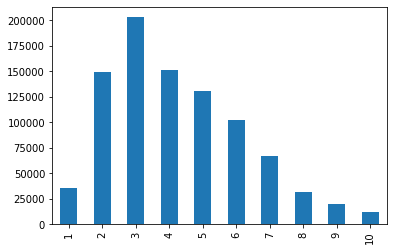

In [5]:
df.age.value_counts().sort_index().plot(kind='bar')

In [6]:
df2 = pd.read_csv("data/train_preliminary/ad.csv")

In [7]:
df2.head()

,creative_id,ad_id,product_id,product_category,advertiser_id,industry
0,1,1,\N,5,381,78
1,4,4,\N,5,108,202
2,7,7,\N,5,148,297
3,8,8,\N,5,713,213
4,9,9,\N,5,695,213


In [8]:
df2.product_category.value_counts()

2     923994
18    663346
3     283817
8     233832
5     227970
13     38072
17     35638
4      22917
12     19592
6      12077
7       7611
16      7216
9       2970
11      1379
15       332
1        259
14        95
10        18
Name: product_category, dtype: int64

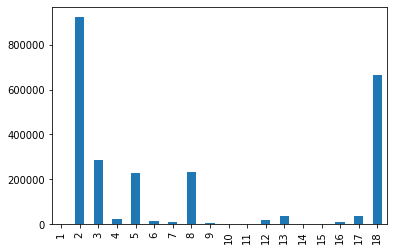

In [9]:
df2.product_category.value_counts().sort_index().plot(kind='bar')

In [10]:
df2.industry.value_counts()

247    262634
319    178677
6      161962
322    159928
\N     101048
        ...  
268         1
325         1
68          1
78          1
266         1
Name: industry, Length: 326, dtype: int64

In [11]:
df2.corr()

,creative_id,ad_id,product_category,advertiser_id
creative_id,1.000000,0.997678,-0.041031,0.270326
ad_id,0.997678,1.000000,-0.043707,0.272517
product_category,-0.041031,-0.043707,1.000000,-0.071983
advertiser_id,0.270326,0.272517,-0.071983,1.000000


In [12]:
df.corr()

,user_id,age,gender
user_id,1.000000,0.000659,-0.000112
age,0.000659,1.000000,0.005038
gender,-0.000112,0.005038,1.000000


In [13]:
df3 = pd.read_csv("data/train_preliminary/click_log.csv")

In [14]:
df3.head()

,time,user_id,creative_id,click_times
0,9,30920,567330,1
1,65,30920,3072255,1
2,56,30920,2361327,1
3,6,309204,325532,1
4,59,309204,2746730,1


In [15]:
df3.corr()

,time,user_id,creative_id,click_times
time,1.000000,-0.000467,0.755364,-0.021150
user_id,-0.000467,1.000000,-0.000527,0.000352
creative_id,0.755364,-0.000527,1.000000,-0.012460
click_times,-0.021150,0.000352,-0.012460,1.000000


In [16]:
df3.click_times.value_counts()

1      28426543
2       1507449
3         90356
4         43047
5          7507
6          3512
7          1529
8          1486
9           452
10          270
11          172
12          116
13           76
14           62
15           36
16           34
17           22
18           21
21           17
20           13
19           10
22            5
23            4
26            3
32            3
27            3
30            3
24            3
25            2
29            2
33            2
37            2
28            1
67            1
34            1
35            1
36            1
43            1
44            1
50            1
152           1
Name: click_times, dtype: int64

In [17]:
df3.groupby('user_id')['click_times'].sum()

user_id
1         14
2         46
3         30
4         29
5         34
          ..
899996    14
899997    20
899998    15
899999    22
900000    12
Name: click_times, Length: 900000, dtype: int64

In [18]:
df3.head()

,time,user_id,creative_id,click_times
0,9,30920,567330,1
1,65,30920,3072255,1
2,56,30920,2361327,1
3,6,309204,325532,1
4,59,309204,2746730,1


In [19]:
df4 = df3.groupby('user_id')['click_times'].sum()

In [20]:
df4.head()

user_id
1    14
2    46
3    30
4    29
5    34
Name: click_times, dtype: int64

In [21]:
df = pd.merge(df, df4, left_on='user_id', right_on='user_id')

In [22]:
df.head()

,user_id,age,gender,click_times
0,1,4,1,14
1,2,10,1,46
2,3,7,2,30
3,4,5,1,29
4,5,4,1,34


In [23]:
df3.shape

(30082771, 4)

In [24]:
df3["fre_creative_id"] = (df3.groupby("user_id")["creative_id"].transform(lambda x: x.value_counts().index[0]))

In [25]:
df3.head()

,time,user_id,creative_id,click_times,fre_creative_id
0,9,30920,567330,1,2361397
1,65,30920,3072255,1,2361397
2,56,30920,2361327,1,2361397
3,6,309204,325532,1,819237
4,59,309204,2746730,1,819237


In [26]:
df4 = df3.drop_duplicates(subset=['user_id'],keep='first')

In [27]:
df4 = df4[['user_id', 'creative_id']]

In [28]:
df = pd.merge(df, df4, left_on='user_id', right_on='user_id')

In [29]:
df.head()

,user_id,age,gender,click_times,creative_id
0,1,4,1,14,71691
1,2,10,1,46,4194247
2,3,7,2,30,2556703
3,4,5,1,29,1962706
4,5,4,1,34,2386115


In [30]:
df5 = df2[['creative_id', 'product_category']]

In [31]:
df = pd.merge(df, df5, left_on='creative_id', right_on='creative_id')

In [32]:
df.head()

,user_id,age,gender,click_times,creative_id,product_category
0,1,4,1,14,71691,18
1,162,3,1,24,71691,18
2,1114,6,2,11,71691,18
3,5728,5,1,11,71691,18
4,14099,5,1,16,71691,18


In [33]:
df.shape

(900000, 6)

In [34]:
X_train, X_test = df.iloc[:800000, 3:], df.iloc[800000:, 3:]

In [35]:
Y1_train, Y2_train, Y1_test, Y2_test = df.iloc[:800000, 1:2], df.iloc[:800000, 2:3], df.iloc[800000:, 1:2], df.iloc[800000:, 2:3]

In [36]:
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [37]:
Y2_train = 2 - Y2_train

In [38]:
Y2_train

,gender
0,1
1,1
2,0
3,1
4,1
...,...
799995,1
799996,0
799997,1
799998,1


In [39]:
model = Sequential()
model.add(Dense(12, input_dim=3, kernel_initializer='normal', activation='relu'))
model.add(Dense(1, kernel_initializer='normal'))
model.compile(loss='MSE', optimizer='adam')
model.fit(X_train, Y2_train, nb_epoch=20)

/Users/lixiang/Documents/GitHub/xzwbsrz_pre/venv/lib/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """


Epoch 1/20
800000/800000 [==============================] - 15s 18us/step - loss: 27991.2401
Epoch 2/20
800000/800000 [==============================] - 14s 18us/step - loss: 1.4171
Epoch 3/20
800000/800000 [==============================] - 15s 18us/step - loss: 0.2212
Epoch 4/20
800000/800000 [==============================] - 15s 18us/step - loss: 0.2212
Epoch 5/20
800000/800000 [==============================] - 14s 18us/step - loss: 0.2212
Epoch 6/20
800000/800000 [==============================] - 14s 18us/step - loss: 0.2212
Epoch 7/20
800000/800000 [==============================] - 14s 18us/step - loss: 0.2212
Epoch 8/20
800000/800000 [==============================] - 14s 18us/step - loss: 0.2212 
Epoch 9/20
800000/800000 [==============================] - 14s 18us/step - loss: 0.2212
Epoch 10/20
800000/800000 [==============================] - 14s 18us/step - loss: 0.2212
Epoch 11/20
800000/800000 [==============================] - 14s 18us/step - loss: 0.2212
Epoch 12/20
80

In [40]:
Y2_train_predict = model.predict(X_train)

In [41]:
Y_tmp = abs(Y2_train - Y2_train_predict)

In [42]:
Y_tmp[Y_tmp<0.5].count()

gender    535931
dtype: int64

In [43]:
Y2_train_predict

array([[0.6676035],
       [0.6676035],
       [0.6676035],
       ...,
       [0.6676035],
       [0.6676035],
       [0.6676035]], dtype=float32)

In [44]:
print('accurency:', Y_tmp[Y_tmp<0.5].count()/800000)

accurency: gender    0.669914
dtype: float64


In [45]:
df.describe()

,user_id,age,gender,click_times,creative_id,product_category
count,900000.000000,900000.000000,900000.000000,900000.000000,9.000000e+05,900000.000000
mean,450000.500000,4.246100,1.330433,35.535336,1.784233e+06,8.415598
std,259807.765473,2.003552,0.470369,41.415282,1.318839e+06,7.075812
min,1.000000,1.000000,1.000000,10.000000,4.000000e+00,1.000000
25%,225000.750000,3.000000,1.000000,16.000000,4.891630e+05,2.000000
50%,450000.500000,4.000000,1.000000,25.000000,1.649516e+06,5.000000
75%,675000.250000,6.000000,2.000000,42.000000,2.965702e+06,18.000000
max,900000.000000,10.000000,2.000000,21330.000000,4.445711e+06,18.000000


In [46]:
df.drop('creative_id', axis = 1, inplace=True)

In [47]:
df_tmp = pd.get_dummies(df['product_category'], prefix='category')

In [48]:
pd.get_dummies(df)

,user_id,age,gender,click_times,product_category
0,1,4,1,14,18
1,162,3,1,24,18
2,1114,6,2,11,18
3,5728,5,1,11,18
4,14099,5,1,16,18
...,...,...,...,...,...
899995,899984,9,1,62,2
899996,899985,5,1,46,5
899997,899990,5,1,12,3
899998,899994,4,2,14,18


In [49]:
df = pd.concat([df.drop('product_category', axis = 1), df_tmp], axis=1)

In [50]:
df.head()

,user_id,age,gender,click_times,category_1,category_2,category_3,category_4,category_5,category_6,...,category_9,category_10,category_11,category_12,category_13,category_14,category_15,category_16,category_17,category_18
0,1,4,1,14,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,162,3,1,24,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,1114,6,2,11,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,5728,5,1,11,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,14099,5,1,16,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [51]:
from sklearn import preprocessing

In [52]:
X = df.iloc[:, 3:]
Y1, Y2 = df.iloc[:, 1:2], df.iloc[:, 2:3]

In [53]:
preprocessing.MinMaxScaler().fit_transform(X)

array([[1.87617261e-04, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [6.56660413e-04, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [4.69043152e-05, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       ...,
       [9.38086304e-05, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.87617261e-04, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [1.87617261e-04, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00]])

In [54]:
X = preprocessing.MinMaxScaler().fit_transform(X)

In [55]:
Y1 = preprocessing.MinMaxScaler().fit_transform(Y1)
Y2 = preprocessing.MinMaxScaler().fit_transform(Y2)

In [56]:
X_train, X_test = X[:800000], X[800000:]
Y1_train, Y1_test, Y2_train, Y2_test = Y1[:800000], Y1[800000:], Y2[:800000], Y2[800000:]

In [57]:
model = Sequential()
model.add(Dense(12, input_dim=19, kernel_initializer='normal', activation='relu'))
model.add(Dense(1, kernel_initializer='normal'))
model.compile(loss='MSE', optimizer='adam')
model.fit(X_train, Y2_train, nb_epoch=20)

/Users/lixiang/Documents/GitHub/xzwbsrz_pre/venv/lib/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """


Epoch 1/20
800000/800000 [==============================] - 15s 19us/step - loss: 0.2193
Epoch 2/20
800000/800000 [==============================] - 15s 19us/step - loss: 0.2190 0s -
Epoch 3/20
800000/800000 [==============================] - 15s 19us/step - loss: 0.2189
Epoch 4/20
800000/800000 [==============================] - 15s 19us/step - loss: 0.2189
Epoch 5/20
800000/800000 [==============================] - 15s 19us/step - loss: 0.2189
Epoch 6/20
800000/800000 [==============================] - 15s 19us/step - loss: 0.2189
Epoch 7/20
800000/800000 [==============================] - 15s 19us/step - loss: 0.2188
Epoch 8/20
800000/800000 [==============================] - 15s 19us/step - loss: 0.2188
Epoch 9/20
800000/800000 [==============================] - 15s 19us/step - loss: 0.2188
Epoch 10/20
800000/800000 [==============================] - 15s 19us/step - loss: 0.2188
Epoch 11/20
800000/800000 [==============================] - 15s 19us/step - loss: 0.2188
Epoch 12/20
80

In [58]:
Y2_train_predict = model.predict(X_train)
Y2_train_predict

array([[0.34550118],
       [0.33962664],
       [0.34726357],
       ...,
       [0.37625885],
       [0.35818994],
       [0.29857883]], dtype=float32)

In [59]:
model2 = Sequential()
model2.add(Dense(12, input_dim=19, kernel_initializer='normal', activation='relu'))
model2.add(Dense(1, kernel_initializer='normal'))
model2.compile(loss='MSE', optimizer='adam')
model2.fit(X_train, Y1_train, nb_epoch=20)

/Users/lixiang/Documents/GitHub/xzwbsrz_pre/venv/lib/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """


Epoch 1/20
800000/800000 [==============================] - 16s 20us/step - loss: 0.0488
Epoch 2/20
800000/800000 [==============================] - 16s 21us/step - loss: 0.0485
Epoch 3/20
800000/800000 [==============================] - 16s 20us/step - loss: 0.0485
Epoch 4/20
800000/800000 [==============================] - 16s 20us/step - loss: 0.0485
Epoch 5/20
800000/800000 [==============================] - 15s 18us/step - loss: 0.0485
Epoch 6/20
800000/800000 [==============================] - 16s 20us/step - loss: 0.0485
Epoch 7/20
800000/800000 [==============================] - 17s 21us/step - loss: 0.0485
Epoch 8/20
800000/800000 [==============================] - 16s 20us/step - loss: 0.0485
Epoch 9/20
800000/800000 [==============================] - 16s 20us/step - loss: 0.0485
Epoch 10/20
800000/800000 [==============================] - 16s 20us/step - loss: 0.0485
Epoch 11/20
800000/800000 [==============================] - 16s 20us/step - loss: 0.0485
Epoch 12/20
800000/

In [60]:
Y1_train_predict = model2.predict(X_train)
Y1_train_predict

array([[0.35724023],
       [0.35626894],
       [0.35753164],
       ...,
       [0.3434365 ],
       [0.5180005 ],
       [0.3567327 ]], dtype=float32)

In [61]:
Y1_train_predict = np.round(Y1_train_predict * 10 + 0.5)

In [62]:
Y1_train_predict

array([[4.],
       [4.],
       [4.],
       ...,
       [4.],
       [6.],
       [4.]], dtype=float32)

In [63]:
df_tmp = df['age'][:800000]

In [70]:
df_tmp.shape

(800000,)

In [79]:
ans = 0
for i in range(800000):
    if Y1_train_predict[i] == df_tmp[i]:
        ans += 1

In [80]:
ans

134565

In [85]:
Y2_train_predict = model.predict(X_train)
Y2_train_predict = np.round(Y2_train_predict) + 1
Y2_train_predict

array([[1.],
       [1.],
       [1.],
       ...,
       [1.],
       [1.],
       [1.]], dtype=float32)

In [86]:
ans2 = 0
for i in range(800000):
    if Y2_train_predict[i] == df['gender'][i]:
        ans2 += 1

In [87]:
ans2

536645

In [88]:
print('accurency:', ans/800000, ans2/800000)

accurency: 0.16820625 0.67080625
